In [27]:
import geopandas as gpd
import pygee
import os

In [18]:
# Set variables
ISO = "GTM"
IC = "LANDSAT/LT05/C01/T1"
YEAR = "2010"
MONTH = "1"
DATES = pygee.GetDays(YEAR, MONTH)
BANDS = ["B3", "B2", "B1"]

#### Download a shapefile from the geoBoundaries API

In [31]:
pygee.downloadGB(iso = ISO, 
                 adm = "2",
                 base_dir = "./")

Making request to:  https://www.geoboundaries.org/gbRequest.html?ISO=GTM&ADM=ADM2
Done downloading boundary data.


In [10]:
gdf = gpd.read_file("./GTM/GTM_ADM2_fixedInternalTopology.shp")
gdf.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,IxchiguÃ¡n,None,GTM-ADM2-1590671490-B1,GTM,ADM2,"POLYGON ((-91.99385 15.16840, -91.97422 15.167..."
1,Tajumulco,None,GTM-ADM2-1590671490-B2,GTM,ADM2,"POLYGON ((-92.07984 15.03108, -92.08004 15.035..."
2,San Luis,None,GTM-ADM2-1590671490-B3,GTM,ADM2,"POLYGON ((-89.95281 16.24511, -89.94712 16.246..."
3,RÃ­o Blanco,None,GTM-ADM2-1590671490-B4,GTM,ADM2,"POLYGON ((-91.70805 15.02218, -91.69669 15.038..."
4,Retalhuleu,None,GTM-ADM2-1590671490-B5,GTM,ADM2,"POLYGON ((-92.16528 14.48544, -92.15901 14.491..."


<AxesSubplot:>

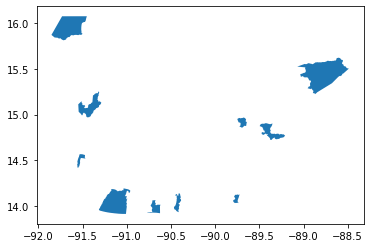

In [24]:
gdf[100:110].plot()

#### The downlaod_imagery function will downlaod a zip file which contains the invdival.tiff files for each of the bands in the BANDS list. The name of the zip file will be {shapeID}_{DATES[0]}_{DATES[1]}.zip. The second function, save_pngs, will extract the files in the zip folder and create an RGB composite of them and save them to the export dir. This function isn't always super reliable and depends on the data type of the image that you download, so I'd recommend double checking the composites before trusting they are correct. The source code is at https://github.com/heatherbaier/pygee/blob/master/pygee/save_pngs.py. If the composites don't look correct, I'd recommend copying that code and making it work for your purposes. 

In [29]:
for col, row in gdf[100:105].iterrows():
    
    pygee.download_imagery(geom = row.geometry,
                           shapeID = row.shapeID,
                           ic = IC, 
                           dates = DATES, 
                           imagery_dir = "./imagery", 
                           bands = BANDS)
    
    pygee.save_pngs(shapeID = row.shapeID,
                    base_dir = "./imagery",
                    export_dir = "./extracted",
                    l = 5)        


GTM-ADM2-1590671490-B101  has  1  images available between  2010-1-1 and 2010-1-31


Lossy conversion from float64 to uint8. Range [14.0, 109.0]. Convert image to uint8 prior to saving to suppress this warning.


Image  0  of  1 ---- Month: May
GTM-ADM2-1590671490-B102  has  1  images available between  2010-1-1 and 2010-1-31


Lossy conversion from float64 to uint8. Range [12.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


Image  0  of  1 ---- Month: May
GTM-ADM2-1590671490-B103  has  1  images available between  2010-1-1 and 2010-1-31


Lossy conversion from float64 to uint8. Range [20.0, 152.0]. Convert image to uint8 prior to saving to suppress this warning.


Image  0  of  1 ---- Month: May
GTM-ADM2-1590671490-B104  has  1  images available between  2010-1-1 and 2010-1-31


Lossy conversion from float64 to uint8. Range [11.0, 168.0]. Convert image to uint8 prior to saving to suppress this warning.


Image  0  of  1 ---- Month: May
GTM-ADM2-1590671490-B105  has  1  images available between  2010-1-1 and 2010-1-31


Lossy conversion from float64 to uint8. Range [9.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


Image  0  of  1 ---- Month: May


Download shapefile for specified country and administrative unit for geoBoundaries.org